<a href="https://colab.research.google.com/github/Mahmood-Anaam/Artificial-Intelligence/blob/main/Arabic_Image_Captioning_using_Transformers_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Image Captioning using Pre-training of Deep Bidirectional Transformers

[Paper](https://aclanthology.org/2022.inlg-main.4/)

[Repository](https://github.com/jontooy/Arabic-Image-Captioning-using-Transformers/tree/main?tab=readme-ov-file)

## Oscar

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**The cell below, loads all Oscar files and then stores them in google drive, so it is executed only once.**

In [2]:
# !mkdir /content/drive/MyDrive/Oscar
# !gdown https://drive.google.com/drive/folders/1NaVaCNQ0dWFOJpWWIRGHCFeftz1t7ZJ7?usp=sharing -O /content/drive/MyDrive/Oscar --folder --quiet

In [2]:
%cd  /content/drive/MyDrive/Oscar
!python setup.py build develop
!pip install -r requirements.txt
%cd /content

/content/drive/MyDrive/Oscar
running build
running build_py
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:41: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or ot

In [3]:
!apt-get install -y openjdk-11-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre
  x11-utils
0 upgraded, 14 newly installed, 0 to remove and 0 not upgraded.
Need to get 5,517 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubunt

In [4]:
!java -version

openjdk version "11.0.24" 2024-07-16
OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04)
OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)


---

## Feature extraction

In [5]:
%cd /content
!git clone https://github.com/Mahmood-Anaam/vinvl-visualbackbone.git
%cd /content/vinvl-visualbackbone
!pip install -r requirements.txt --quiet
!pip install torch==1.13.1 torchvision==0.14.1
!pip install numpy==1.21.6
%cd /content

/content
Cloning into 'vinvl-visualbackbone'...
remote: Enumerating objects: 574, done.
remote: Counting objects: 100% (574/574), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 574 (delta 200), reused 452 (delta 120), pack-reused 0 (from 0)
Receiving objects: 100% (574/574), 18.74 MiB | 42.35 MiB/s, done.
Resolving deltas: 100% (200/200), done.
/content/vinvl-visualbackbone
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 908.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 759.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.3 MB/s eta 0:0

/content


In [1]:
%cd /content/vinvl-visualbackbone/scene_graph_benchmark
!python setup.py build develop --quiet
%cd /content

/content/vinvl-visualbackbone/scene_graph_benchmark
running build
running build_py
creating build/lib.linux-x86_64-cpython-310/maskrcnn_benchmark
copying maskrcnn_benchmark/__init__.py -> build/lib.linux-x86_64-cpython-310/maskrcnn_benchmark
creating build/lib.linux-x86_64-cpython-310/scene_graph_benchmark
copying scene_graph_benchmark/registry.py -> build/lib.linux-x86_64-cpython-310/scene_graph_benchmark
copying scene_graph_benchmark/scene_parser.py -> build/lib.linux-x86_64-cpython-310/scene_graph_benchmark
copying scene_graph_benchmark/AttrRCNN.py -> build/lib.linux-x86_64-cpython-310/scene_graph_benchmark
copying scene_graph_benchmark/__init__.py -> build/lib.linux-x86_64-cpython-310/scene_graph_benchmark
creating build/lib.linux-x86_64-cpython-310/maskrcnn_benchmark/layers
copying maskrcnn_benchmark/layers/misc.py -> build/lib.linux-x86_64-cpython-310/maskrcnn_benchmark/layers
copying maskrcnn_benchmark/layers/roi_pool.py -> build/lib.linux-x86_64-cpython-310/maskrcnn_benchmark/l

In [2]:
# download Feature extraction model (vinvl_vg_x152c4)
%cd /content/vinvl-visualbackbone/scene_graph_benchmark
!mkdir -p models
%cd models
!git lfs install # if not installed
!git clone https://huggingface.co/michelecafagna26/vinvl_vg_x152c4
%cd /content

/content/vinvl-visualbackbone/scene_graph_benchmark
/content/vinvl-visualbackbone/scene_graph_benchmark/models
Updated git hooks.
Git LFS initialized.
Cloning into 'vinvl_vg_x152c4'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17 (from 1)
Unpacking objects: 100% (17/17), 39.67 KiB | 5.67 MiB/s, done.
/content


In [3]:
# download dataset
%cd /content
!git clone https://huggingface.co/datasets/jontooy/Flickr8k-Image-Features

/content
Cloning into 'Flickr8k-Image-Features'...
remote: Enumerating objects: 43, done.
remote: Total 43 (delta 0), reused 0 (delta 0), pack-reused 43 (from 1)
Unpacking objects: 100% (43/43), 868.71 KiB | 2.86 MiB/s, done.
Filtering content: 100% (9/9), 3.28 GiB | 81.88 MiB/s, done.


In [4]:
# download Image captioning model
%cd /content
!git clone https://huggingface.co/jontooy/AraBERT32-Flickr8k

/content
Cloning into 'AraBERT32-Flickr8k'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19 (from 1)
Unpacking objects: 100% (19/19), 259.13 KiB | 6.82 MiB/s, done.


In [ ]:
# Restart runtime
import os
os.kill(os.getpid(), 9)


---
## Import all necessary libraries

In [1]:
import sys
sys.path.append(" /content/drive/MyDrive/Oscar/")
%cd /content/vinvl-visualbackbone/scene_graph_benchmark

/content/vinvl-visualbackbone/scene_graph_benchmark


In [2]:
import warnings
warnings.filterwarnings("ignore")

import base64
import numpy as np
from PIL import Image
import torch
from oscar.modeling.modeling_bert import BertForImageCaptioning
from oscar.testrun_captioning import CaptionTensorizer
from pytorch_transformers import BertTokenizer, BertConfig
from pytorch_transformers import AdamW, WarmupLinearSchedule, WarmupConstantSchedule
import scene_graph_benchmark.wrappers
from scene_graph_benchmark.wrappers import VinVLVisualBackbone


---

## Model evaluation

In [ ]:
# !python /content/Oscar/oscar/testrun_captioning.py \
#     --do_test \
#     --do_eval \
#     --test_yaml /content/Flickr8k-Image-Features/test.yaml \
#     --per_gpu_eval_batch_size 32 \
#     --num_beams 5 \
#     --max_gen_length 20 \
#     --eval_model_dir /content/AraBERT32-Flickr8k



---

## Pretrained Model & Tokenizer


In [3]:
# Load pretrained model and tokenizer
def load_model_and_tokenizer(checkpoint = '/content/AraBERT32-Flickr8k'):
  config_class, model_class, tokenizer_class = BertConfig, BertForImageCaptioning, BertTokenizer
  config = config_class.from_pretrained(checkpoint)
  tokenizer = tokenizer_class.from_pretrained(checkpoint)
  captiontensorizer =  CaptionTensorizer(tokenizer=tokenizer,is_train=False)
  model = model_class.from_pretrained(checkpoint, config=config)
  return model, tokenizer, captiontensorizer

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, tokenizer, captiontensorizer = load_model_and_tokenizer(checkpoint = '/content/AraBERT32-Flickr8k')
model.to(device)
model.eval()

BertForImageCaptioning(
  (bert): BertImgModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CaptionBertEncoder(
      (layer): ModuleList(
        (0): CaptionBertLayer(
          (attention): CaptionBertAttention(
            (self): CaptionBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p


## Caption TSV Dataset

In [5]:
from oscar.testrun_captioning import CaptionTSVDataset


checkpoint = '/content/AraBERT32-Flickr8k'
tokenizer_class = BertTokenizer
tokenizer = tokenizer_class.from_pretrained(checkpoint)

ds = CaptionTSVDataset(
                        yaml_file = '/content/Flickr8k-Image-Features/test.yaml',
                        tokenizer=tokenizer,
                        add_od_labels=False,
                        max_img_seq_length=50,
                        max_seq_length=70,
                        max_seq_a_length=40,
                        is_train=False,
                        mask_prob=0.15,
                        max_masked_tokens=3,
                        )

ds[0]

('405615014_03be7ef618',
 (tensor([2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  tensor([[1, 0, 0,  ..., 0, 0, 0],
          [1, 1, 0,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]),
  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  tensor([[0.5395, 0.2009, 0.0000,  ..., 0.5421, 0.5421, 0.9983],
          [0.0000, 0.0000, 0.0000,  ..., 0.8230, 0.5111, 0.4459],
          [0.1484, 2.1260, 0.0000,  ..., 0.5891, 0.2200, 0.2845],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.00

---

## Inference

### Visual features

In [6]:
def get_image_features(feature_extractor,img_file):
  dets = feature_extractor(img_file)
  v_feats = np.concatenate((dets['features'],  dets['spatial_features']), axis=1)
  labels = dets['classes']
  return v_feats, labels



---

### Generate captions

In [7]:
def generate_captions(model,inputs, tokenizer):

  cls_token_id, sep_token_id, pad_token_id, mask_token_id, period_token_id = \
      tokenizer.convert_tokens_to_ids([tokenizer.cls_token, tokenizer.sep_token,
      tokenizer.pad_token, tokenizer.mask_token, '.'])

  model.eval()

  inputs_param = {
      'is_decode': True,
      'do_sample': False,
      'bos_token_id': cls_token_id,
      'pad_token_id': pad_token_id,
      'eos_token_ids': [sep_token_id],
      'mask_token_id': mask_token_id,
      # for adding od labels
      'add_od_labels': False,
      'od_labels_start_posid': 40,

      # hyperparameters of beam search
      'max_length': 70,
      'num_beams': 1,
      "temperature":1,
      "top_k": 0,
      "top_p": 1,
      "num_return_sequences": 1,
      "num_keep_best": 1,
      "repetition_penalty": 1.0,
  }

  inputs = {
      'input_ids': inputs[0],
      'attention_mask': inputs[1],
      'token_type_ids': inputs[2],
      'img_feats': inputs[3],
      'masked_pos': inputs[4],
      }

  inputs.update(inputs_param)
  # captions, logprobs
  outputs = model(**inputs)
  all_caps = outputs[0]  # examples_size * num_keep_best * max_len
  all_confs = torch.exp(outputs[1])
  res = []
  for cap, conf in zip(all_caps, all_confs):
      cap = tokenizer.decode(cap.squeeze().tolist(), skip_special_tokens=True)
      res.append({'caption': cap, 'conf': conf.item()})
  return res

In [8]:
def collate_fn(inputs):
  input_ids = torch.stack([torch.tensor(x[0]) for x in inputs])
  attention_mask = torch.stack([torch.tensor(x[1]) for x in inputs])
  token_type_ids = torch.stack([torch.tensor(x[2]) for x in inputs])
  img_feats = torch.stack([torch.tensor(x[3]) for x in inputs])
  masked_pos = torch.stack([torch.tensor(x[4]) for x in inputs])
  return input_ids, attention_mask, token_type_ids, img_feats, masked_pos



---

### Image captioning

In [9]:
# feature extractor & tokenizer & model Generate captions
feature_extractor = VinVLVisualBackbone()
model, tokenizer, captiontensorizer = load_model_and_tokenizer(checkpoint = '/content/AraBERT32-Flickr8k')

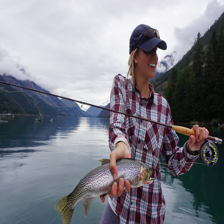

In [10]:
img_file = "/content/vinvl-visualbackbone/scene_graph_benchmark/demo/woman_fish.jpg"
Image.open(img_file).convert('RGB').resize((224,224))

In [11]:
# input tensorizer

visual_features , _  = get_image_features(feature_extractor=feature_extractor,img_file=img_file)
inputs =captiontensorizer.tensorize_example(img_feat=visual_features,text_a='', text_b=None)
batch = collate_fn([inputs])

# generate captions
captions = generate_captions(model=model,inputs=batch, tokenizer=tokenizer)
captions

[{'caption': 'اربعة من القمصان السوداء في سترة سوداء',
  'conf': 0.11341530829668045}]



---

